---
<h1 style="text-align: center;">IF867 - Introdução à Aprendizagem Profunda</h1>
<h2 style="text-align: center;">1ª atividade prática</h2>

---
---
*Discente:*

* Gabriel D'assumpção de Carvalho - gdc2@cin.ufpe.br

*Curso:*

* Ciências Atuariais - 7º Período

<div style="text-align: center;">
29/11/2024
</div>

# Introdução

O objetivo desta atividade é desenvolver um algoritmo de MLP (Multilayer Perceptron) do zero, sem utilizar bibliotecas específicas de machine learning. Por conta disso, optou-se por não realizar uma análise exploratória aprofundada. Além disso, não investigamos detalhadamente o impacto de possíveis duplicatas na distribuição das variáveis, nem verificamos se essas duplicações poderiam ser causadas por erros de arredondamento.

Foram utilizados dois conjuntos de dados distintos: um para realizar a regressão do custo do seguro e outro para a classificação multiclasse das espécies de plantas do dataset Iris. Após a importação dos dados, diversas funções foram implementadas para o pré-processamento das observações, incluindo: conversão de variáveis categóricas em numéricas, remoção de duplicidades, tratamento de valores nulos, conversão da variável target do dataset Iris em formato one-hot e a criação de uma função para dividir os dados em conjuntos de treinamento e teste.

# Importações

## Bibliotecas

In [505]:
# Desativa todos os avisos
import warnings
warnings.filterwarnings("ignore")

import numpy as np # Data manipulation
import pandas as pd  # Data manipulation
pd.options.display.float_format = "{:.4f}".format
import matplotlib.pyplot as plt # Data visualization
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
)  # Data visualization

# Nueral network
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad

## Datasets

### Insurence

Insurance é uma base de dados disponível no [Kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data). A base contém
1.338 observações e 6 características, com o custo do seguro médico como variável alvo. A seguir, estão
as variáveis da base de dados:


| Atributo   | Descrição                                                      | Tipo                    |
|------------|----------------------------------------------------------------|-------------------------|
| *Idade*     | A idade da pessoa segurada.                                    | Inteiro                 |
| *Sexo*      | Gênero (masculino ou feminino) do segurado.                     | Categórico - Binário    |
| *IMC*        | Índice de Massa Corporal: uma medida de gordura corporal baseada na altura e no peso. | Contínuo                |
| *Crianças*   | O número de dependentes cobertos.                               | Inteiro                 |
| *Fumante*    | Se o segurado é fumante (sim ou não).                           | Categórico - Binário    |
| *Região*     | A área geográfica de cobertura.                                | Categórico - Nominal    |
| *Encargos*   | Os custos do seguro médico incorridos pelo segurado.            | Contínuo                |

In [506]:
# Urls of the datasets
insurence = pd.read_csv(
    "https://raw.githubusercontent.com/gabrieldadcarvalho/neural_network/refs/heads/main/projeto/data/insurance.csv"
)

insurence.head()

,age,sex,imc,children,smoke,region,charges
0,19,female,27.9000,0,yes,southwest,16884.9240
1,18,male,33.7700,1,no,southeast,1725.5523
2,28,male,33.0000,3,no,southeast,4449.4620
3,33,male,22.7050,0,no,northwest,21984.4706
4,32,male,28.8800,0,no,northwest,3866.8552


Para uma análise exploratória mais detalhada, consulte o seguinte repositório:
[Modelagem de Redes Neurais para
Previsão de Custos em Seguros de
Saúde](https://github.com/gabrieldadcarvalho/neural_network/blob/main/projeto/Neural_Network_Projetc.pdf)

### Iris

O dataset Iris é uma base de dados clássica e amplamente utilizada em machine learning, disponível no [Kaggle](https://www.kaggle.com/datasets/uciml/iris?select=Iris.csv) ou em diversas outras plataformas de banco de dados e em bibliotecas como *tensorflow*. Ele contém informações sobre três espécies de plantas do gênero *Iris*: *Iris setosa*, *Iris versicolor* e *Iris virginica*. O objetivo principal ao utilizar este dataset é a classificação das espécies, dadas as características de suas pétalas e sépalas.

O dataset consiste em 150 observações, divididas igualmente entre as três espécies, e possui 5 atributos, onde um deles corresponde ao nome da espécie e os outros quatro as características das pétalas e sépalas. Os atributos são:

| Atributo         | Descrição                                                                             | Tipo       | Unidade  |
|------------------|---------------------------------------------------------------------------------------|------------|----------|
| *sepal length*  | Comprimento da sépala.                                                               | Contínuo   | centímetros |
| *sepal width*  | Largura da sépala.                                                                  | Contínuo   | centímetros |
| *petal length* | Comprimento da pétala.                                                              | Contínuo   | centímetros |
| *petal width*  | Largura da pétala.                                                                   | Contínuo   | centímetros |
| *species*      | Espécie da planta iris (setosa, versicolor ou virginica).                                        | Categórico | -        |

In [507]:
# Url of the iris dataset
url_iris = "https://raw.githubusercontent.com/gabrieldadcarvalho/deep_learning/refs/heads/master/exercise_list/01/data/iris/iris.data"

# Read of the arquives CSV
iris = pd.read_csv(url_iris, sep=",", header=None)

# Adding name of the variables
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# 5 first rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1000,3.5000,1.4000,0.2000,Iris-setosa
1,4.9000,3.0000,1.4000,0.2000,Iris-setosa
2,4.7000,3.2000,1.3000,0.2000,Iris-setosa
3,4.6000,3.1000,1.5000,0.2000,Iris-setosa
4,5.0000,3.6000,1.4000,0.2000,Iris-setosa


# Tratamento dos dados

Nessa sessão vai ser elaborado funções para fazer um breve tratamento no banco de dados para facilitar o aprendizado da rede.

In [508]:
def print_stats(df, action, missing=False):
    if missing:
        print(f"Variables with missing values: \n{df.isna().sum()}")
        print("==" * 20)
        print(f"Total of missing values: \n{df.isna().sum().sum()}")
        print("==" * 20)
        if df.isna().any().any():
            print(f"Observations of missing values: \n{df[df.isna().any(axis=1)]}")
            print("==" * 20)
    else:
        print(f"Variables with duplicated values: \n{df.duplicated().sum()}")
        print("==" * 20)
        print(f"Total of duplicated values: \n{df.duplicated().sum()}")
        print("==" * 20)
        if df.duplicated().any():
            print(
                f"Observations of duplicated values: \n{df[df.duplicated(keep=False)]}"
            )
            print("==" * 20)

    print(f"Old shape: {df.shape}")

    return df


def drop_nan(df):
    # Show statistics
    print_stats(df, action="dropna", missing=True)

    # Drop of missing values
    df_cleaned = df.dropna()
    print(f"New shape: {df_cleaned.shape}")
    return df_cleaned


def drop_duplicates(df):
    # Show Statistics
    print_stats(df, action="drop_duplicates", missing=False)

    # Drop of duplicated values
    df_cleaned = df.drop_duplicates()
    print(f"New shape: {df_cleaned.shape}")
    return df_cleaned


def trans_categorical(df):
    print(df.info())
    print("==" * 20)

    categorical_cols = df.select_dtypes(include=["object"]).columns
    category_dict = {}  # Initialize an empty dictionary to store mappings

    if len(categorical_cols) > 0:
        for column in categorical_cols:
            category_mapping = {
                category: index
                for index, category in enumerate(pd.Categorical(df[column]).categories)
            }
            df[column] = df[column].map(category_mapping)
            category_dict[column] = (
                category_mapping  # Store the mapping for this column
            )

            print(f"Column: {column} has {df[column].nunique()} categories")
            print("Mapping:", category_mapping)
            print("==" * 20)

        print("Transformation was made successfully!")
        print("==" * 20)
        print("New info:")
        print(df.info())
    else:
        print("No categorical columns found.")

    return df, category_dict


def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]


def split(x, y, percent, seed):
    np.random.seed(seed)
    l = np.arange(x.shape[0])
    np.random.shuffle(l)
    train_size = int(len(l) * percent)
    train_indices = l[:train_size]
    test_indices = l[train_size:]
    X_train, X_test = x[train_indices], x[test_indices]
    Y_train, Y_test = y[train_indices], y[test_indices]
    return X_train, X_test, Y_train, Y_test

## Insurence

### Transformação Categórica

In [509]:
insurence, categ_wine = trans_categorical(insurence)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   imc       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoke     1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Column: sex has 2 categories
Mapping: {'female': 0, 'male': 1}
Column: smoke has 2 categories
Mapping: {'no': 0, 'yes': 1}
Column: region has 4 categories
Mapping: {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
Transformation was made successfully!
New info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age      

Podemos observar na função acima que o banco de dados 'insurance' contém três variáveis categóricas: sexo, fumo (smoke) e região (region). Para realizar a análise, foi feita uma transformação dessas variáveis em valores numéricos. O sexo foi codificado como 0 e 1, o fumo também como 0 e 1, e a região foi convertida nos valores 0, 1 e 2.

### Removendo Valores Ausentes

In [510]:
insurence = drop_nan(insurence)

Variables with missing values: 
age         0
sex         0
imc         0
children    0
smoke       0
region      0
charges     0
dtype: int64
Total of missing values: 
0
Old shape: (1338, 7)
New shape: (1338, 7)


Conforme observado nas funções anteriores, o dataframe do banco de dados de seguro não apresenta dados ausentes em nenhuma de suas variáveis.

### Removendo duplicidades

In [511]:
insurence = drop_duplicates(insurence)

Variables with duplicated values: 
1
Total of duplicated values: 
1
Observations of duplicated values: 
     age  sex     imc  children  smoke  region   charges
195   19    1 30.5900         0      0       1 1639.5631
581   19    1 30.5900         0      0       1 1639.5631
Old shape: (1338, 7)
New shape: (1337, 7)


No entanto, foram identificados 2 dados duplicados, sendo assim foi removido uma das observações passando de 1338 observações para 1337.

### Divisão de Treinamento, Validação e Teste

In [512]:
X_train_insurance, X_test_insurance, Y_train_insurance, Y_test_insurance = split(
    insurence.drop("charges", axis=1).values, insurence["charges"].values, 0.8, 42
)

Na função acima, os dados foram divididos inicialmente em 80% para treinamento (1.069 observações) e 20% para teste (267 observações).

### Padronização Z-score

Para padronizar os dados, será utilizada a técnica do Z-score, que ajusta a base de treinamento para ter desvio padrão igual a 1 e média igual a 0. Após esse ajuste, o desvio padrão e a média calculados na base de treinamento serão armazenados e aplicados posteriormente à base de teste. Essa abordagem evita que a padronização introduza informações da base de teste na base de treinamento, o que poderia enviesar o modelo. Esse cuidado é especialmente importante em situações reais, onde as novas observações (teste) não estão disponíveis durante o treinamento.

In [513]:
X_mean_insurance = np.mean(X_train_insurance, axis=0)
X_std_insurance = np.std(X_train_insurance, axis=0)

Y_mean_insurance = np.mean(Y_train_insurance)
Y_std_insurance = np.std(Y_train_insurance)

X_train_insurance = (X_train_insurance - X_mean_insurance) / X_std_insurance
Y_train_insurance = (Y_train_insurance - Y_mean_insurance) / Y_std_insurance

X_test_insurance = (X_test_insurance - X_mean_insurance) / X_std_insurance
Y_test_insurance = (Y_test_insurance - Y_mean_insurance) / Y_std_insurance

## Iris

### Transformação Categórica

In [514]:
iris, categ_iris = trans_categorical(iris)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Column: species has 3 categories
Mapping: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
Transformation was made successfully!
New info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 n

No banco de dados "iris", a variável target é categórica e multiclasse, com as categorias: Iris-setosa, Iris-versicolor e Iris-virginica. Para facilitar o processamento, essas categorias foram transformadas em valores numéricos: 0, 1 e 2, respectivamente.

### Removendo Valores Ausentes

In [515]:
iris = drop_nan(iris)

Variables with missing values: 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Total of missing values: 
0
Old shape: (150, 5)
New shape: (150, 5)


Também não foram identificados valores ausentes em nenhuma das variáveis.

### Removendo Valores Duplicados

In [516]:
iris = drop_duplicates(iris)

Variables with duplicated values: 
3
Total of duplicated values: 
3
Observations of duplicated values: 
     sepal_length  sepal_width  petal_length  petal_width  species
9          4.9000       3.1000        1.5000       0.1000        0
34         4.9000       3.1000        1.5000       0.1000        0
37         4.9000       3.1000        1.5000       0.1000        0
101        5.8000       2.7000        5.1000       1.9000        2
142        5.8000       2.7000        5.1000       1.9000        2
Old shape: (150, 5)
New shape: (147, 5)


Ao verificar a presença de valores duplicados, foram identificadas 3 observações repetidas da espécie Iris-setosa e 2 da espécie Iris-virginica. Como resultado, foram removidas 2 observações da Iris-setosa e 1 da Iris-virginica, totalizando 3 remoções. Com isso, o número de registros foi reduzido de 150 para 147, representando uma perda de apenas 2% da base de dados, o que é considerado um impacto mínimo na integridade do conjunto.

### Divisão de Treinamento, Validação e Teste

In [517]:
X_train_iris, X_test_iris, Y_train_iris, Y_test_iris = split(
    iris.drop("species", axis=1).values, iris["species"].values, 0.8, 42
)

In [518]:
Y_train_iris_one_hot = one_hot_encode(Y_train_iris, 3)

### Padronização Z-score

In [519]:
X_mean_iris = np.mean(X_train_iris, axis=0)
X_std_iris = np.std(X_train_iris, axis=0)


X_train_iris = (X_train_iris - X_mean_iris) / X_std_iris

X_test = (X_test_iris - X_mean_iris) / X_std_iris

# Modelo

In [520]:
def relu(net):
    return np.maximum(0, net)


def d_relu(net):
    return np.where(net > 0, 1, 0)


def linear(net):
    return net


def d_linear(net):
    return 1


def sigmoid(net):
    return 1 / (1 + np.exp(-net))


def d_sigmoid(net):
    return sigmoid(net) * (1 - sigmoid(net))


def softmax(net):
    exp_net = np.exp(net)
    return exp_net / np.sum(exp_net)


def d_softmax(net):
    return softmax(net) * (1 - softmax(net))


def tanh(x):
    return np.tanh(x)


def d_tanh(x):
    return 1 - np.tanh(x) ** 2


def categorical_crossentropy(y_true, y_pred):
    # Clipping to avoid log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.sum(y_true * np.log(y_pred))


def d_categorical_crossentropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -(y_true / y_pred)


def mse(y_true, y_pred):
    return np.mean(np.power((y_pred - y_true), 2))


def d_mse(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size


class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        raise NotImplementedError

    def backward(self, output_error, learnign_rate):
        raise NotImplementedError


class FCLayer(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.normal(
            0, np.sqrt(2 / (input_size + output_size)), (input_size, output_size)
        )
        self.bias = np.zeros(output_size)
        self.weights_cache = np.zeros_like(self.weights)
        self.bias_cache = np.zeros_like(self.bias)

    def forward(self, input):
        self.input = input
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward(self, output_error, learning_rate, l1_lambda=0.0, l2_lambda=0.0):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.reshape(1, -1).T, output_error.reshape(1, -1))
        bias_error = np.sum(output_error, axis=0, keepdims=True)

        weights_error += (
            l1_lambda * np.sign(self.weights) + 2 * l2_lambda * self.weights
        )

        self.weights_cache += weights_error**2
        self.bias_cache += bias_error**2

        self.weights -= (
            learning_rate * weights_error / (np.sqrt(self.weights_cache) + 1e-8)
        )
        self.bias -= learning_rate * bias_error / (np.sqrt(self.bias_cache) + 1e-8)

        return input_error


class ActivationLayer(Layer):
    def __init__(self, activation, activation_derivative):
        self.activation = activation
        self.activation_derivative = activation_derivative

    def forward(self, input):
        self.input = input
        self.output = self.activation(self.input)
        return self.output

    def backward(self, output_error, learning_rate):
        return self.activation_derivative(self.input) * output_error


class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_derivative = None

    def add(self, layer):
        self.layers.append(layer)

    def loss_use(self, loss, loss_derivative):
        self.loss = loss
        self.loss_derivative = loss_derivative

    def predict(self, input):
        result = []
        for obs in range(input.shape[0]):
            output = input[obs, :]
            for layer in self.layers:
                output = layer.forward(output)
            result.append(output)
        return np.array(result)

    def train(
        self,
        x_train,
        y_train,
        epoch=100,
        batch_size=10,
        learning_rate=0.01,
        seed=42,
        l1_lambda=0.0,
        l2_lambda=0.0,
    ):
        np.random.seed(seed)
        self.batch_size = batch_size
        self.total_sample = x_train.shape[0]
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda

        if self.batch_size < 1 or self.batch_size > self.total_sample:
            self.batch_size = self.total_sample

        self.indices = np.random.choice(self.total_sample, self.batch_size, replace=False)
        self.mini_batch = x_train[self.indices, :]
        y_train = y_train[self.indices]

        losses = []

        for i in range(epoch):
            err = 0
            for obs in range(self.batch_size):
                output = self.mini_batch[obs, :]
                for layer in self.layers:
                    output = layer.forward(output)

                # Calcular perda com penalização L1 e L2
                loss = self.loss(y_train[obs], output)  # type: ignore
                l1_penalty = sum(
                    np.abs(layer.weights).sum()
                    for layer in self.layers
                    if isinstance(layer, FCLayer)
                )
                l2_penalty = sum(
                    np.square(layer.weights).sum()
                    for layer in self.layers
                    if isinstance(layer, FCLayer)
                )
                loss += l1_lambda * l1_penalty + l2_lambda * l2_penalty
                err += loss

                # Backpropagation
                erro = self.loss_derivative(y_train[obs], output)  # type: ignore
                for layer in reversed(self.layers):
                    if isinstance(layer, FCLayer):
                        erro = layer.backward(
                            erro, learning_rate, self.l1_lambda, self.l2_lambda
                        )
                    else:
                        erro = layer.backward(erro, learning_rate)

            err /= self.batch_size
            print("epoch %d/%d   error=%f" % (i + 1, epoch, err))
            losses.append(err)

        import matplotlib.pyplot as plt

        plt.plot(losses)
        plt.title("Função de Perda no Treinamento")
        plt.xlabel("epoch")
        plt.ylabel("Loss")
        plt.grid()
        plt.show()

A estrutura do código implementa uma rede neural feedforward (totalmente conectada) com funcionalidades de regularização L1 e L2, otimização Adagrad e suporte para diferentes funções de ativação e funções de perda. Vamos detalhar cada parte:

**1. Funções de Ativação e suas Derivadas:**

*   **`relu(net)`:** Implementa a função ReLU (Rectified Linear Unit). Retorna `net` se `net` > 0, e 0 caso contrário. É uma função não linear que ajuda a rede a aprender padrões complexos.
*   **`d_relu(net)`:** Calcula a derivada da função ReLU. Retorna 1 se `net` > 0, e 0 caso contrário.
*   **`linear(net)`:** Implementa uma função linear, que apenas retorna o valor de `net` sem modificação.
*   **`d_linear(net)`:** Calcula a derivada da função linear, que é sempre 1.
*   **`sigmoid(net)`:** Implementa a função sigmoide, que mapeia qualquer valor para um intervalo entre 0 e 1. Útil em problemas de classificação binária.
*   **`d_sigmoid(net)`:** Calcula a derivada da função sigmoide.
*   **`softmax(net)`:** Implementa a função softmax, que converte um vetor de valores para uma distribuição de probabilidade (soma 1). Usada em problemas de classificação multiclasse.
*   **`d_softmax(net)`:** Calcula a derivada da função softmax.
*   **`tanh(x)`:** Implementa a função tangente hiperbólica, que mapeia valores para um intervalo entre -1 e 1.
*  **`d_tanh(x)`:** Calcula a derivada da função tangente hiperbólica.

**2. Funções de Perda (Loss Functions) e suas Derivadas:**

*   **`categorical_crossentropy(y_true, y_pred)`:** Implementa a função de perda categorical cross-entropy, usada em problemas de classificação multiclasse. Ela mede a diferença entre a distribuição de probabilidade prevista (`y_pred`) e a real (`y_true`).
    *   Para evitar erros de `log(0)`, um valor muito pequeno (1e-15) é utilizado na saída.
*   **`d_categorical_crossentropy(y_true, y_pred)`:** Calcula a derivada da função categorical cross-entropy.
 *     Para evitar erros de divisão por 0, um valor muito pequeno (1e-15) é usado para fazer a previsão.
*   **`mse(y_true, y_pred)`:** Implementa a função de perda Mean Squared Error (Erro Quadrático Médio). Usada em problemas de regressão. Ela calcula a média do quadrado das diferenças entre a predição e o valor real.
*   **`d_mse(y_true, y_pred)`:** Calcula a derivada da função Mean Squared Error.

**3. Classe `Layer` (Classe Base):**

*   **`__init__(self)`:** Inicializa um objeto da classe Layer. As variáveis `input` e `output` recebem o valor `None` inicialmente.
*   **`forward(self, input)`:**  É um método abstrato que deve ser implementado pelas subclasses. Define a passagem para frente (forward pass), aplicando a lógica da camada na entrada.
*   **`backward(self, output_error, learning_rate)`:** É um método abstrato que deve ser implementado pelas subclasses. Define a retropropagação (backward pass), calculando o erro e ajustando os pesos.

**4. Classe `FCLayer` (Fully Connected Layer):**

*   **`__init__(self, input_size, output_size)`:** Inicializa uma camada totalmente conectada.
    *   `self.weights`: Inicializa os pesos com valores aleatórios de acordo com a distribuição de Xavier (normal). A distribuição de Xavier é uma técnica que inicializa os pesos baseado no número de entradas e saídas, ajudando a rede a convergir mais rápido e reduzir erros de vanishing gradient e exploding gradient.
    *   `self.bias`: Inicializa os bias com zeros.
    *   `self.weights_cache` e `self.bias_cache`: Inicializa os arrays de cache para armazenar a soma dos quadrados dos pesos e bias para o otimizador Adagrad
*   **`forward(self, input)`:** Implementa a passagem para frente.
    *   Armazena o `input` da camada para uso durante a retropropagação.
    *   Calcula a saída multiplicando a entrada pelos pesos (`np.dot(self.input, self.weights)`) e somando o bias.
*   **`backward(self, output_error, learning_rate, l1_lambda=0, l2_lambda=0)`:** Implementa a retropropagação.
     *   Calcula o erro de entrada (`input_error`).
       *  Calcula o erro nos pesos (`weights_error`) com base no erro da saída e na entrada.
         *  Aplica a regularização L1 (Lasso) e L2 (Ridge) aos pesos. Se `l1_lambda` e `l2_lambda` forem maiores que 0, uma das regularizações vai ser aplicada aleatoriamente, se não, as duas serão aplicadas juntas no erro dos pesos.
           *   **L1 Regularization:** Adiciona ao gradiente o termo `l1_lambda * np.sign(self.weights)`, que puxa os pesos em direção a zero.
           *   **L2 Regularization:** Adiciona ao gradiente o termo `l2_lambda * self.weights`, que faz os pesos ficarem menores.
     *   Atualiza os pesos e bias com o algoritmo Adagrad.

**5. Classe `ActivationLayer`:**

*   **`__init__(self, activation, activation_derivative)`:** Inicializa uma camada de ativação. Recebe a função de ativação (`activation`) e sua derivada (`activation_derivative`).
*   **`forward(self, input)`:** Implementa a passagem para frente, aplicando a função de ativação na entrada.
*   **`backward(self, output_error, learning_rate)`:** Implementa a retropropagação, calculando o erro de entrada aplicando a derivada da função de ativação no erro da saída.

**6. Classe `Network`:**

*   **`__init__(self)`:** Inicializa uma rede neural, criando um array vazio de camadas e inicializando `loss` e `loss_derivative` como `None`.
*   **`add(self, layer)`:** Adiciona uma camada ao array de camadas da rede (`self.layers`).
*   **`loss_use(self, loss, loss_derivative)`:** Define a função de perda (`loss`) e sua derivada (`loss_derivative`) que vai ser usada no treinamento da rede.
*   **`predict(self, input)`:** Faz uma predição para cada observação do input, passando a entrada por cada camada da rede.
*  **`train(self, x_train, y_train, epoch=100, batch_size=10, learning_rate=0.01, seed=42, l1_lambda=0.0, l2_lambda=0.0)`:** Implementa o treinamento da rede.
    *   `np.random.seed(seed)`: Garante que os resultados sejam os mesmos toda vez que o código rodar, com o mesmo valor de seed.
    *  `self.batch_size`: Guarda o valor do tamanho da amostra que vai ser usada para o backpropagation.
        *  `self.total_sample`: Guarda o valor do tamanho do conjunto de dados de treinamento.
        *   Se o `batch_size` for menor que 1 ou maior que o tamanho total de amostras, o `batch_size` recebe o valor de total de amostras.
        *   Faz um sorteio aleatório (sem reposição) para escolher as amostras a serem usadas no `batch_size` atual, com os indices das amostras a serem pegas.
        *   Pega os valores das amostras a serem utilizadas para o treinamento em `self.mini_batch`.
        *   Pega os rótulos das amostras a serem utilizadas em `y_train`.
    *   **Loop de Épocas:** Para cada época, itera pelo número de vezes que foi definida.
      *   Para cada amostra do `mini_batch` é feito o `forward` da rede, para pegar os valores de saída.
        *   Calcula o erro da predição atual (`err += self.loss(y_train[obs], output)`) com base na função de perda (`self.loss`).
          *   Calcula o erro para fazer a retropropagação na rede com base na derivada da função de perda (`erro = self.loss_derivative(y_train[obs], output)`).
            *   Faz o `backward` das camadas, de trás para frente, para atualizar os pesos de acordo com o erro (`erro = layer.backward(erro, learning_rate, l1_lambda = self.l1_lambda, l2_lambda = self.l2_lambda)`).
            * Se for do tipo `FCLayer`, passa os parâmetros `l1_lambda` e `l2_lambda`.
          * Calcula o erro médio da época dividindo o valor total pelo tamanho do `batch_size`.
            * Imprime os valores da época atual e o valor do erro.
              * Guarda o erro da época no array `losses`.
    *  Ao final do treinamento, plota o gráfico do erro em cada iteração (época) do treinamento.

**Resumo**

Esta implementação fornece uma estrutura básica para uma rede neural feedforward com:

*   Funções de ativação comuns (ReLU, sigmoid, softmax, tanh).
*   Funções de perda (categorical cross-entropy, MSE).
*   Regularização L1/L2 e método de otimização Adagrad.
*   Flexibilidade para definir a estrutura da rede (número e tipo de camadas).

## Insurance

### Estrutura da Rede

In [521]:
net_insurance_1 = Network()
net_insurance_1.add(FCLayer(X_train_insurance.shape[1], 128)) 
net_insurance_1.add(ActivationLayer(relu, d_relu)) 
net_insurance_1.add(FCLayer(128, 256)) 
net_insurance_1.add(ActivationLayer(relu, d_relu)) 
net_insurance_1.add(FCLayer(256, 800))
net_insurance_1.add(ActivationLayer(relu, d_relu)) 
net_insurance_1.add(FCLayer(800, 256))
net_insurance_1.add(ActivationLayer(relu, d_relu))
net_insurance_1.add(FCLayer(256, 1))
net_insurance_1.add(ActivationLayer(linear, d_linear))
net_insurance_1.loss_use(mse, d_mse)

In [522]:
net_insurance_2 = Network()
net_insurance_2.add(FCLayer(X_train_insurance.shape[1], 128)) 
net_insurance_2.add(ActivationLayer(relu, d_relu))
net_insurance_2.add(FCLayer(128, 256))
net_insurance_2.add(ActivationLayer(relu, d_relu)) 
net_insurance_2.add(FCLayer(256, 800))
net_insurance_2.add(ActivationLayer(relu, d_relu)) 
net_insurance_2.add(FCLayer(800, 256))
net_insurance_2.add(ActivationLayer(relu, d_relu))
net_insurance_2.add(FCLayer(256, 1))
net_insurance_2.add(ActivationLayer(linear, d_linear))
net_insurance_2.loss_use(mse, d_mse)

Para o banco de dados Insurance, foram propostas duas redes neurais para regressão, ambas com a mesma estrutura. A única diferença entre os modelos é a variação no hiperparâmetro de L2-regularização (normalização).

A estrutura da rede neural é composta por 6 valores de entrada, conectados à primeira camada oculta com 128 neurônios. Essa camada está totalmente conectada à segunda camada oculta com 256 neurônios, que, por sua vez, está conectada à terceira camada com 800 neurônios. A quarta camada possui 256 neurônios, e a camada de saída contém 1 neurônio com função de ativação linear. Todas as camadas ocultas utilizam a função de ativação ReLU.

### Treinamento

In [ ]:
net_insurance_1.train(
    X_train_insurance,
    Y_train_insurance,
    epoch=1000,
    batch_size=32,
    learning_rate=0.0001,
    seed=42,
)

In [ ]:
net_insurance_2.train(
    X_train_insurance,
    Y_train_insurance,
    epoch=1000,
    batch_size=32,
    learning_rate=0.0001,
    seed=42,
    l2_lambda=0.01
)

Nos gráficos apresentado, nota-se que o segundo modelo, ao empregar a regularização L2 com intensidade de 0.01, restringiu o aprendizado dos dados. O modelo 2 alcançou um erro de 5.15 na última época, enquanto o modelo 1 obteve um erro de apenas 0.006. Esse aumento no erro é resultado da atuação da regularização L2. Portanto, ao aplicar essa técnica, é aconselhável aumentar ligeiramente o número de épocas de treinamento. O objetivo principal da regularização é, no entanto, promover uma maior capacidade de generalização do modelo. Para verificar se essa hipótese se concretizou, observe os gráficos de dispersão para os dados de teste de ambos os modelos a seguir.

### Teste

In [525]:
out_insurance_1 = net_insurance_1.predict(X_test_insurance)
out_insurance_2 = net_insurance_2.predict(X_test_insurance)

In [526]:
results_df = pd.DataFrame(
    {"Valor Real": Y_test_insurance, "Valor Predito (Modelo 1)": out_insurance_1.flatten(), "Valor Predito (Modelo 2)": out_insurance_2.flatten()}
)

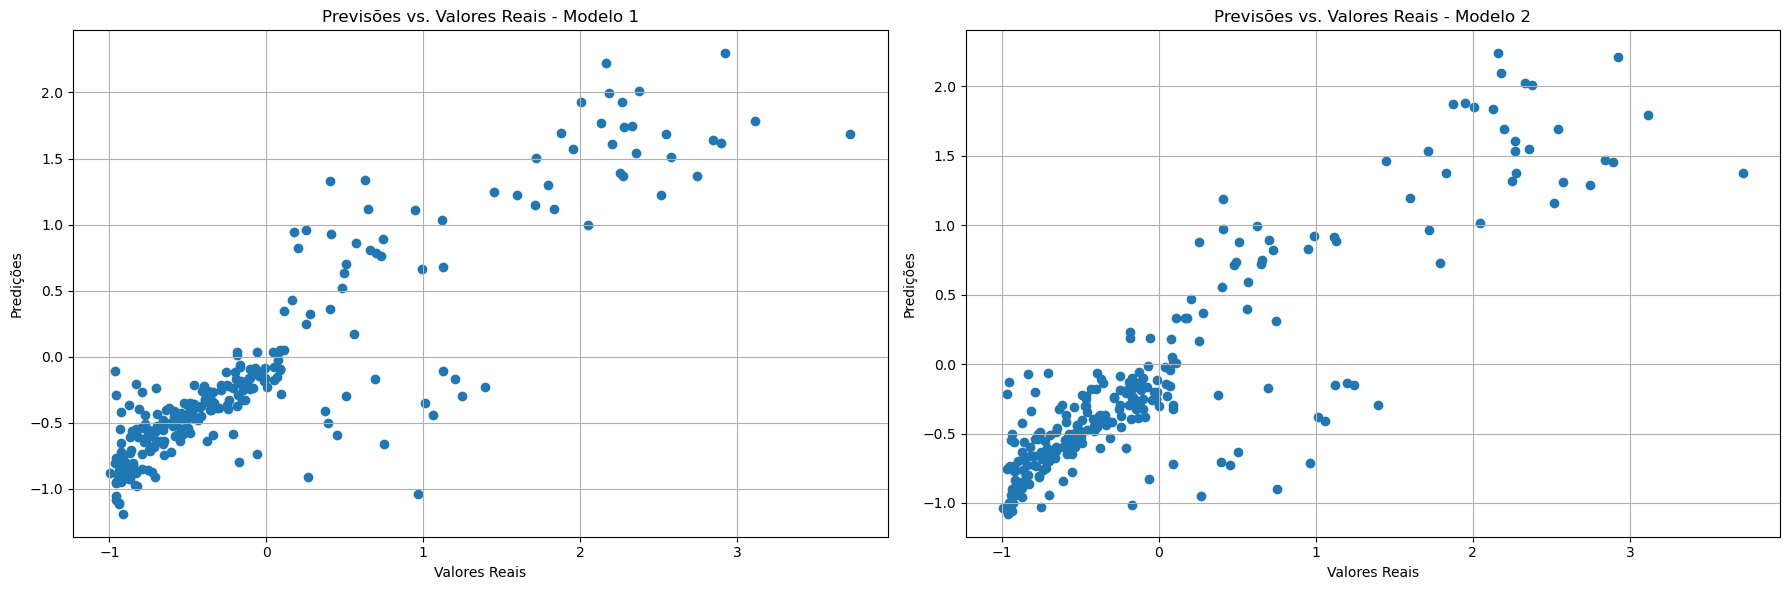

In [527]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].scatter(results_df["Valor Real"], results_df["Valor Predito (Modelo 1)"])
axes[0].set_xlabel("Valores Reais")
axes[0].set_ylabel("Predições")
axes[0].set_title("Previsões vs. Valores Reais - Modelo 1")
axes[0].grid()

axes[1].scatter(results_df["Valor Real"], results_df["Valor Predito (Modelo 2)"])
axes[1].set_xlabel("Valores Reais")
axes[1].set_ylabel("Predições")
axes[1].set_title("Previsões vs. Valores Reais - Modelo 2")
axes[1].grid()

plt.tight_layout()
plt.show()

In [528]:
print(mse(results_df["Valor Real"], results_df["Valor Predito (Modelo 1)"]))
print(mse(results_df["Valor Real"], results_df["Valor Predito (Modelo 2)"]))

0.2092114762329098
0.2299473142862583


o analisarmos o gráfico e o erro quadrático médio (MSE), observamos que o modelo 1 proporcionou uma pequena melhoria na previsão para os dados de treinamento. Contudo, essa diferença não se mostrou tão expressiva quanto a penalidade imposta pela regularização L2 ao MSE de treinamento apresentado pelo modelo 2.

Para uma comparação adicional, propôs-se, em seguida, a mesma arquitetura de rede neural, mas utilizando a biblioteca `keras`.

### Comparando com o Keras

In [529]:
def net_insurance_keras():
    np.random.seed(42)
    modelo = models.Sequential()
    modelo.add(Dense(128, activation="relu", input_shape=(X_train_insurance.shape[1],)))
    modelo.add(Dense(256, activation="relu"))
    modelo.add(Dense(800, activation="relu"))
    modelo.add(Dense(256, activation="relu"))
    modelo.add(Dense(1, activation="linear"))
    # Configurando o Adagrad com taxa de aprendizado de 0.01
    adagrad = Adagrad(learning_rate=0.01)
    modelo.compile(optimizer=adagrad, loss="mse")

    return modelo

In [530]:
net_insurance_keras = net_insurance_keras()

In [ ]:
hist_insurance = net_insurance_keras.fit(
    X_train_insurance, Y_train_insurance, epochs=1000, batch_size=32
)

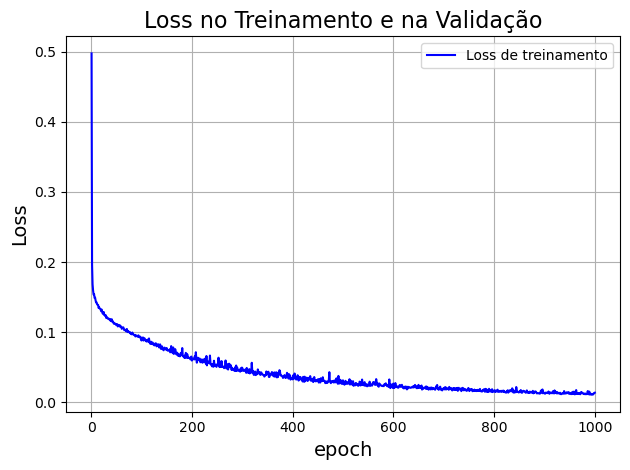

In [532]:
plt.plot(
    range(1, len(hist_insurance.history["loss"]) + 1),
    hist_insurance.history["loss"],
    "-",
    color="blue",
    label="Loss de treinamento",
)
plt.title("Loss no Treinamento e na Validação", fontsize=16)
plt.xlabel("epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [533]:
out_insurance_keras = net_insurance_keras.predict(X_test_insurance)

results_df["Valor Predito (Keras)"] = out_insurance_keras.flatten()

# Exibir o DataFrame
print(results_df.head())

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
   Valor Real  Valor Predito (Modelo 1)  Valor Predito (Modelo 2)  \
0     -0.4068                   -0.2609                   -0.4171   
1      2.1816                    1.9924                    2.0984   
2      1.7929                    1.2999                    0.7269   
3      0.1778                    0.9413                    0.3323   
4     -0.2107                   -0.2327                   -0.2111   

   Valor Predito (Keras)  
0                -0.3654  
1                 2.2232  
2                 0.0300  
3                -0.0725  
4                -0.3287  


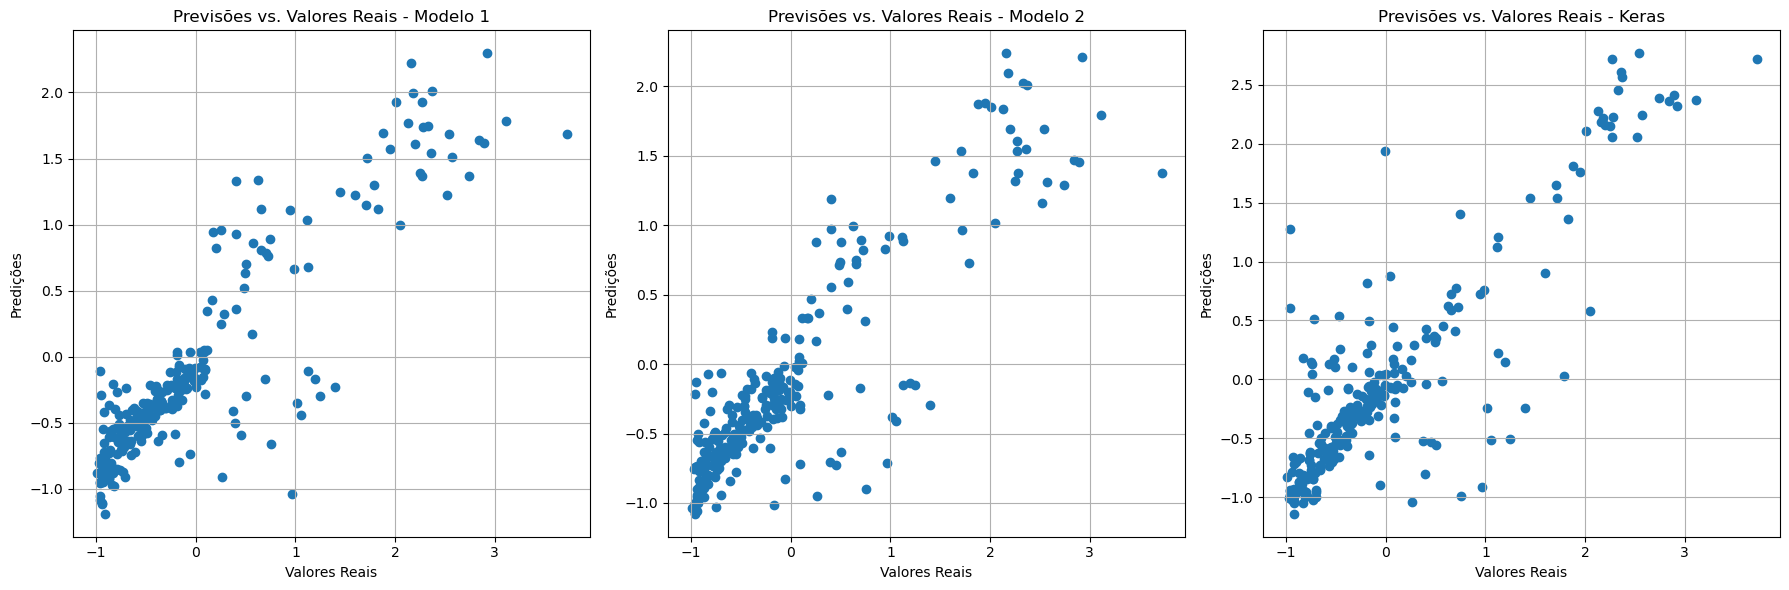

In [559]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(results_df["Valor Real"], results_df["Valor Predito (Modelo 1)"])
axes[0].set_xlabel("Valores Reais")
axes[0].set_ylabel("Predições")
axes[0].set_title("Previsões vs. Valores Reais - Modelo 1")
axes[0].grid()

axes[1].scatter(results_df["Valor Real"], results_df["Valor Predito (Modelo 2)"])
axes[1].set_xlabel("Valores Reais")
axes[1].set_ylabel("Predições")
axes[1].set_title("Previsões vs. Valores Reais - Modelo 2")
axes[1].grid()

axes[2].scatter(results_df["Valor Real"], results_df["Valor Predito (Keras)"])
axes[2].set_xlabel("Valores Reais")
axes[2].set_ylabel("Predições")
axes[2].set_title("Previsões vs. Valores Reais - Keras")
axes[2].grid()

plt.tight_layout()

plt.show()

In [535]:
print(
    "MSE - Modelo 1:",
    mse(results_df["Valor Real"], results_df["Valor Predito (Modelo 1)"]),
)
print(
    "MSE - Modelo 2:",
    mse(results_df["Valor Real"], results_df["Valor Predito (Modelo 2)"]),
)
print(
    "MSE - Modelo Keras:",
    mse(results_df["Valor Real"], results_df["Valor Predito (Keras)"]),
)

MSE - Modelo 1: 0.2092114762329098
MSE - Modelo 2: 0.2299473142862583
MSE - Modelo Keras: 0.23002768318774464


In [ ]:
def net_insurance_keras():
    np.random.seed(42)
    modelo = models.Sequential()
    modelo.add(Dense(128, activation="relu", input_shape=(X_train_insurance.shape[1],)))
    modelo.add(Dense(256, activation="relu"))
    modelo.add(Dense(800, activation="relu"))
    modelo.add(Dense(256, activation="relu"))
    modelo.add(Dense(1, activation="linear"))
    adagrad = Adagrad(learning_rate=0.01)
    modelo.compile(optimizer=adagrad, loss="mse")

    return modelo

Conforme demonstrado no gráfico e na métrica de perda (MSE), o modelo 1 apresentou as melhores previsões, alcançando um MSE de aproximadamente 0.21. Em contraste, o modelo 2 (com regularização L2) e o modelo keras obtiveram um MSE de cerca de 0.23.

Dessa forma, o modelo 1 se mostra preferível para previsões em cenários de custo baixo. É importante notar que todos os modelos apresentam alta variância nas previsões para custos de seguro elevados, o que se deve à escassez de observações na extremidade direita da distribuição dos custos.

A arquitetura da rede neural utilizada, comum a todos os modelos, é composta pelas seguintes camadas:

| Camada            | Tipo           | Neurônios | Função de Ativação | Observações                      |
|--------------------|----------------|-----------|--------------------|----------------------------------|
| Entrada           | -              | 6 (input) | -                  | Baseada no número de features do conjunto de dados `X_train_insurence` |
| Camada Oculta 1   | Dense          | 128        | ReLu               | Primeira camada totalmente conectada |
| Camada Oculta 2   | Dense          | 256        | ReLu               | Segunda camada totalmente conectada |
| Camada Oculta 3   | Dense          | 800        | ReLu               | Terceira camada totalmente conectada |
| Camada Oculta 4   | Dense          | 256        | ReLu               | Quarta camada totalmente conectada |
| Saída             | Dense          | 1         | Linear            | Saída com 1 neurônios, representando a regressão linear do problema |
| **Otimizador**     | **Adagrad**    | -         | -                  | Taxa de aprendizado: 0.01       |
| **Função de Perda**| **Mean Square Error (MSE)** | - | -              | Usada para problemas de regressão |

## Iris

### Estrutura da Rede Neural

In [536]:
net_iris_1 = Network()
net_iris_1.add(FCLayer(X_train_iris.shape[1], 64))
net_iris_1.add(ActivationLayer(tanh, d_tanh))
net_iris_1.add(FCLayer(64, 32))
net_iris_1.add(ActivationLayer(tanh, d_tanh))
net_iris_1.add(FCLayer(32, 3))
net_iris_1.add(ActivationLayer(softmax, d_softmax))
net_iris_1.loss_use(categorical_crossentropy, d_categorical_crossentropy)

In [537]:
net_iris_2 = Network()
net_iris_2.add(FCLayer(X_train_iris.shape[1], 64))
net_iris_2.add(ActivationLayer(tanh, d_tanh))
net_iris_2.add(FCLayer(64, 32))
net_iris_2.add(ActivationLayer(tanh, d_tanh))
net_iris_2.add(FCLayer(32, 3))
net_iris_2.add(ActivationLayer(softmax, d_softmax))
net_iris_2.loss_use(categorical_crossentropy, d_categorical_crossentropy)

Para o banco de dados Iris, foram propostas duas redes neurais para classificação multiclasse, ambas com a mesma estrutura. A única diferença entre os modelos é a variação no valor do hiperparâmetro de L2-regularização (normalização).

A estrutura da rede neural é composta por 4 valores de entrada, conectados à primeira camada oculta com 64 neurônios. Essa camada está totalmente conectada à segunda camada oculta, que possui 32 neurônios, e a camada de saída contém 3 neurônios, com a função de ativação softmax para selecionar o argumento máximo (maior probabilidade) da classe. Todas as camadas ocultas utilizam a função de ativação tanh.

### Treinamento

In [ ]:
net_iris_1.train(
    X_train_iris,
    Y_train_iris_one_hot,
    epoch=1000,
    batch_size=32,
    learning_rate=0.001,
    seed=42,
)

In [ ]:
net_iris_2.train(
    X_train_iris,
    Y_train_iris_one_hot,
    epoch=1000,
    batch_size=32,
    learning_rate=0.001,
    seed=42,
    l2_lambda=0.001,
)

No histórico de erros e no gráfico acima, podemos observar que ambos os modelos apresentaram uma queda de erro praticamente idêntica, com o modelo 2 exibindo apenas um erro levemente maior. Isso sugere que a regularização L2 não trouxe mudanças significativas para o aprendizado da rede. Para uma análise mais detalhada do desempenho, apresentamos abaixo a matriz de confusão para os dados de teste.

### Teste

In [540]:
out_iris_1 = net_iris_1.predict(X_test_iris)
out_iris_2 = net_iris_2.predict(X_test_iris)

In [541]:
argmax_iris_1 = []
argmax_iris_2 = []
for i in range(X_test_iris.shape[0]):
    argmax_iris_1.append(np.argmax(out_iris_1[i]))
    argmax_iris_2.append(np.argmax(out_iris_2[i]))

In [542]:
results_df_iris = {'Valor Real': Y_test_iris, 'Valor Predito (Modelo 1)': argmax_iris_1, 'Valor Predito (Modelo 2)': argmax_iris_2}

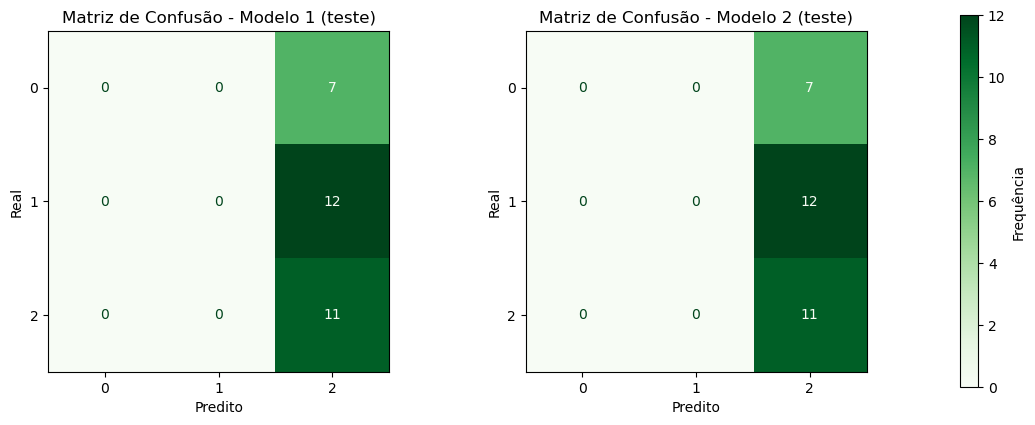

In [543]:
y_true = results_df_iris["Valor Real"]
y_pred_1 = results_df_iris["Valor Predito (Modelo 1)"]
y_pred_2 = results_df_iris["Valor Predito (Modelo 2)"]

cm_1 = confusion_matrix(y_true, y_pred_1)
cm_2 = confusion_matrix(y_true, y_pred_2)

fig, axes = plt.subplots(
    1, 2, figsize=(12, 6), gridspec_kw={"width_ratios": [1, 1], "wspace": 0.4}
)

norm = plt.Normalize(vmin=0, vmax=np.max([cm_1, cm_2]))
sm = plt.cm.ScalarMappable(cmap="Greens", norm=norm)
sm.set_array([])

disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp_1.plot(cmap="Greens", ax=axes[0], colorbar=False)
axes[0].set_title("Matriz de Confusão - Modelo 1 (teste)")
axes[0].set_xlabel("Predito")
axes[0].set_ylabel("Real")

disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp_2.plot(cmap="Greens", ax=axes[1], colorbar=False)
axes[1].set_title("Matriz de Confusão - Modelo 2 (teste)")
axes[1].set_xlabel("Predito")
axes[1].set_ylabel("Real")

cbar = fig.colorbar(sm, ax=axes, location="right", fraction=0.02, pad=0.1)
cbar.set_label("Frequência")

plt.tight_layout()
plt.show()

In [544]:
print(categ_iris)

{'species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}


Como pode ser observado na matriz acima, ambos os modelos classificam todas as plantas como pertencentes à classe 2 ('Iris-virginica') nos dados de teste. Isso indica que os modelos estão excessivamente enviesados para os padrões da espécie Iris-virginica, comprometendo sua capacidade de generalização.

Para realizar mais uma comparação de modelos, propomos abaixo uma rede neural com a mesma estrutura, porém implementada utilizando a biblioteca `keras`.

### Comparando com o Keras

In [545]:
def net_iris_keras():
    np.random.seed(42)
    modelo = models.Sequential()
    modelo.add(Dense(64, activation="tanh", input_shape=(X_train_iris.shape[1],)))
    modelo.add(Dense(32, activation="tanh"))
    modelo.add(Dense(3, activation="softmax"))
    adagrad = Adagrad(learning_rate=0.01)
    modelo.compile(optimizer=adagrad, loss="categorical_crossentropy")

    return modelo

In [546]:
net_iris_keras = net_iris_keras()

In [ ]:
hist_iris = net_iris_keras.fit(
    X_train_iris, Y_train_iris_one_hot, epochs=1000, batch_size=32
)

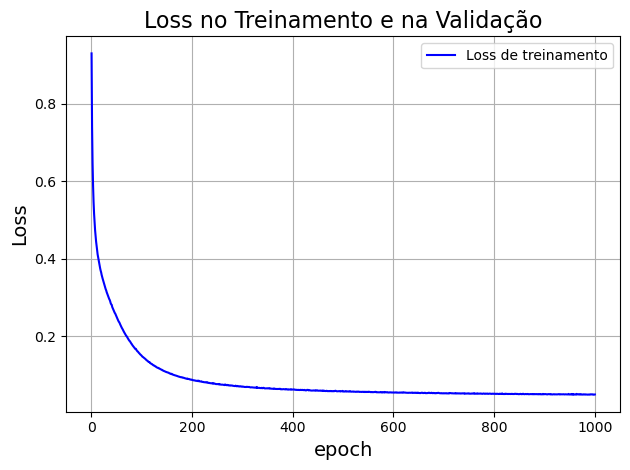

In [548]:
plt.plot(
    range(1, len(hist_iris.history["loss"]) + 1),
    hist_iris.history["loss"],
    "-",
    color="blue",
    label="Loss de treinamento",
)
plt.title("Loss no Treinamento e na Validação", fontsize=16)
plt.xlabel("epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [549]:
out_iris_keras = net_iris_keras.predict(X_test_iris)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [550]:
argmax_iris_keras = []
for i in range(X_test_iris.shape[0]):
    argmax_iris_keras.append(np.argmax(out_iris_keras[i]))

results_df_iris["Valor Predito (Keras)"] = argmax_iris_keras

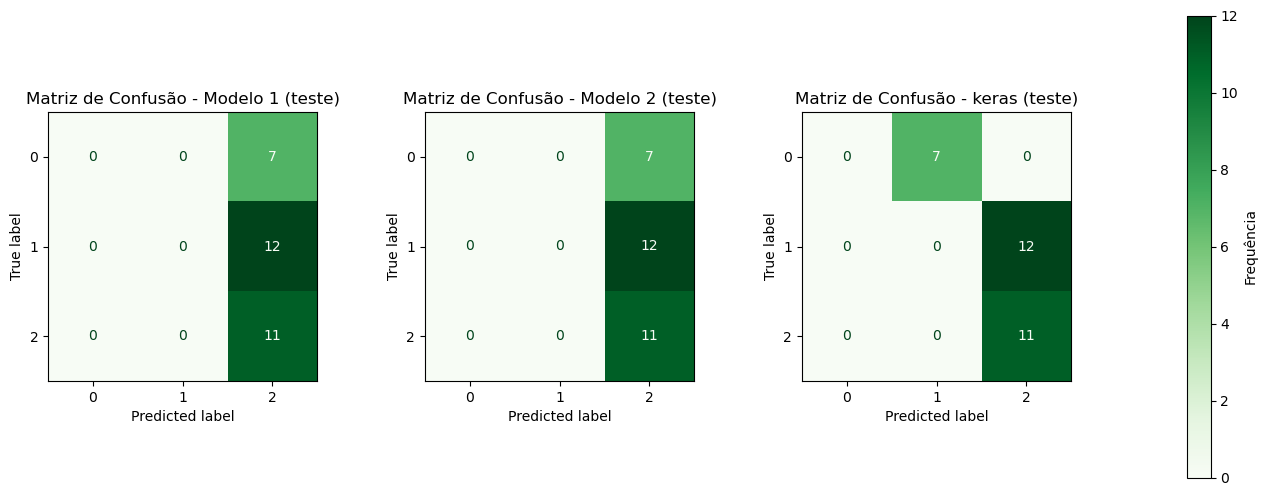

In [551]:
y_true = results_df_iris["Valor Real"]
y_pred_1 = results_df_iris["Valor Predito (Modelo 1)"]
y_pred_2 = results_df_iris["Valor Predito (Modelo 2)"]

cm_1 = confusion_matrix(y_true, results_df_iris["Valor Predito (Modelo 1)"])
cm_2 = confusion_matrix(y_true, results_df_iris["Valor Predito (Modelo 2)"])
cm_keras = confusion_matrix(y_true, results_df_iris["Valor Predito (Keras)"])

fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 1], 'wspace': 0.4})

norm = plt.Normalize(vmin=0, vmax=np.max([cm_1, cm_2, cm_keras]))
sm = plt.cm.ScalarMappable(cmap="Greens", norm=norm)
sm.set_array([])

disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp_1.plot(cmap="Greens", ax=axes[0], colorbar=False)
axes[0].set_title("Matriz de Confusão - Modelo 1 (teste)")

disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp_2.plot(cmap="Greens", ax=axes[1], colorbar=False)
axes[1].set_title("Matriz de Confusão - Modelo 2 (teste)")

disp_keras = ConfusionMatrixDisplay(confusion_matrix=cm_keras)
disp_keras.plot(cmap="Greens", ax=axes[2], colorbar=False)
axes[2].set_title("Matriz de Confusão - keras (teste)")

cbar = fig.colorbar(sm, ax=axes, location="right", fraction=0.02, pad=0.1)
cbar.set_label("Frequência")

plt.tight_layout()
plt.show()

In [552]:
print(categ_iris)

{'species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}


Ao analisarmos todos os modelos, podemos observar que o modelo implementado em `keras` classifica todas as Iris-setosa (classe 0) como Iris-versicolor (classe 1) e, para as classes 1 e 2, afirma que todas pertencem à classe 2 (Iris-virginica). Isso sugere que a estrutura da rede torna o modelo incapaz de classificar corretamente a classe 0 em novas observações. Para verificar se ele é capaz de identificar a classe 0, analisamos abaixo a matriz de confusão para os dados de treinamento.

In [553]:
out_iris_keras = net_iris_keras.predict(X_train_iris)
out_iris_1 = net_iris_1.predict(X_train_iris)
out_iris_2 = net_iris_2.predict(X_train_iris)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [554]:
argmax_iris_1 = []
argmax_iris_2 = []
for i in range(X_train_iris.shape[0]):
    argmax_iris_1.append(np.argmax(out_iris_1[i]))
    argmax_iris_2.append(np.argmax(out_iris_2[i]))


In [555]:
results_df_iris = {
    "Valor Real": Y_train_iris,
    "Valor Predito (Modelo 1)": argmax_iris_1,
    "Valor Predito (Modelo 2)": argmax_iris_2,
}

In [556]:
argmax_iris_keras = []
for i in range(X_train_iris.shape[0]):
    argmax_iris_keras.append(np.argmax(out_iris_keras[i]))

results_df_iris["Valor Predito (Keras)"] = argmax_iris_keras

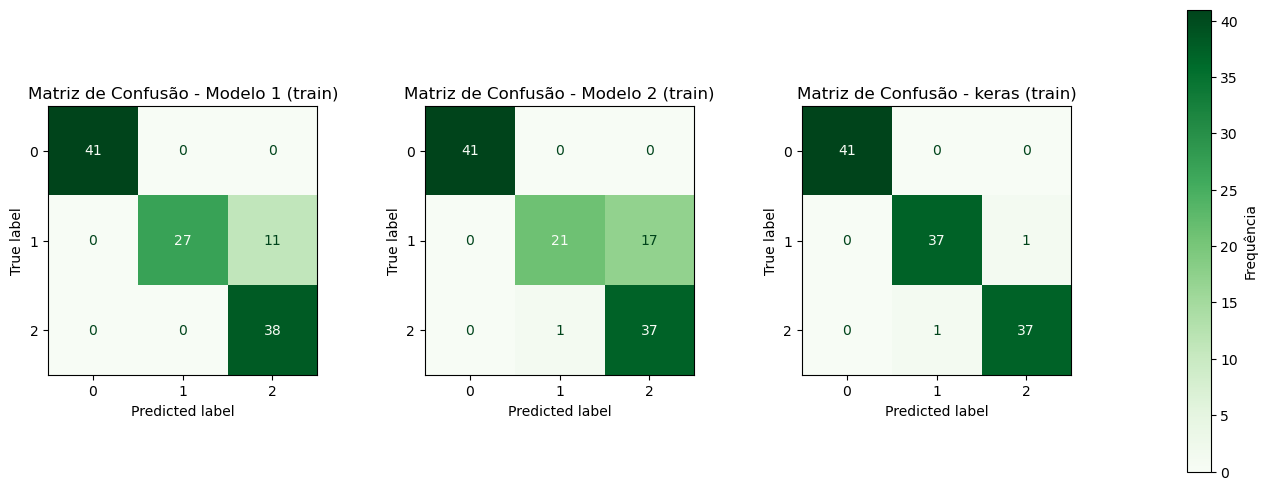

In [557]:
y_true = results_df_iris["Valor Real"]
y_pred_1 = results_df_iris["Valor Predito (Modelo 1)"]
y_pred_2 = results_df_iris["Valor Predito (Modelo 2)"]

cm_1 = confusion_matrix(y_true, results_df_iris["Valor Predito (Modelo 1)"])
cm_2 = confusion_matrix(y_true, results_df_iris["Valor Predito (Modelo 2)"])
cm_keras = confusion_matrix(y_true, results_df_iris["Valor Predito (Keras)"])

fig, axes = plt.subplots(
    1, 3, figsize=(15, 6), gridspec_kw={"width_ratios": [1, 1, 1], "wspace": 0.4}
)

norm = plt.Normalize(vmin=0, vmax=np.max([cm_1, cm_2, cm_keras]))
sm = plt.cm.ScalarMappable(cmap="Greens", norm=norm)
sm.set_array([])

disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp_1.plot(cmap="Greens", ax=axes[0], colorbar=False)
axes[0].set_title("Matriz de Confusão - Modelo 1 (train)")

disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp_2.plot(cmap="Greens", ax=axes[1], colorbar=False)
axes[1].set_title("Matriz de Confusão - Modelo 2 (train)")

disp_keras = ConfusionMatrixDisplay(confusion_matrix=cm_keras)
disp_keras.plot(cmap="Greens", ax=axes[2], colorbar=False)
axes[2].set_title("Matriz de Confusão - keras (train)")

cbar = fig.colorbar(sm, ax=axes, location="right", fraction=0.02, pad=0.1)
cbar.set_label("Frequência")

plt.tight_layout()
plt.show()

Ao analisar os dados de treinamento, observamos que os modelos acertam todas as 41 observações da classe 0. No entanto, tanto o modelo 1 quanto o modelo 2 apresentam dificuldades em classificar corretamente a classe 1, frequentemente atribuindo essas observações à classe 2. Esse comportamento pode estar associado ao fato de a base de dados conter apenas 150 observações, sendo apenas 30 destinadas para teste, o que limita a capacidade dos modelos de generalizar e classificar adequadamente as classes.

Portanto, a estrutura de rede proposta demonstrou-se ineficaz para realizar previsões confiáveis em novas observações.

| Camada            | Tipo           | Neurônios | Função de Ativação | Observações                      |
|--------------------|----------------|-----------|--------------------|----------------------------------|
| Entrada           | -              | 4 (input) | -                  | Baseada no número de features do conjunto de dados `X_train_iris` |
| Camada Oculta 1   | Dense          | 64        | Tanh               | Primeira camada totalmente conectada |
| Camada Oculta 2   | Dense          | 32        | Tanh               | Segunda camada totalmente conectada |
| Saída             | Dense          | 3         | Softmax            | Saída com 3 neurônios, representando as 3 classes do problema |
| **Otimizador**     | **Adagrad**    | -         | -                  | Taxa de aprendizado: 0.01       |
| **Função de Perda**| **Categorical Crossentropy** | - | -              | Usada para problemas de classificação multiclasse |